In [1]:
import pandas as pd

import matplotlib.pyplot as plt

Для этого урока используются данные о качестве воздуха (наличие оксида озота), [источник данных](https://openaq.org), используется модуль [py-openaq](http://dhhagan.github.io/py-openaq/index.html).

Набор air_quality_no2.csv данных содержит значения оксида озота (NO2) для измерительных станций FR04014, BETR801 и London Westminster соответственно в Париже, Антверпене и Лондоне.

In [3]:
air_quality = pd.read_csv("data/air_quality_no2.csv",
                            index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


Использование параметров index_col и parse_dates параметров read_csv функции для определения первого (0-го) столбца в качестве индекса полученного результата DataFrame и преобразования дат в столбце в Timestamp объекты соответственно.

https://pandas.pydata.org/pandas-docs/stable/_images/04_plot_overview1.svg

Я хочу быструю визуальную проверку данных.

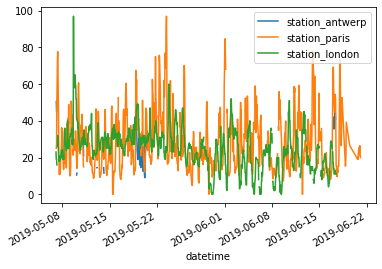

In [5]:
air_quality.plot();

С помощью DataFrame pandas по умолчанию создается один линейный график для каждого из столбцов с числовыми данными.

Я хочу построить только столбцы таблицы данных с данными из Парижа.

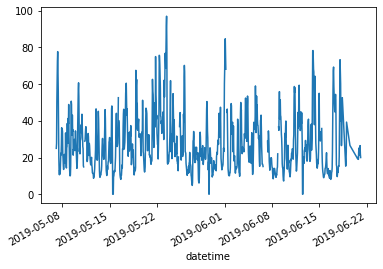

In [7]:
air_quality["station_paris"].plot();

Чтобы построить конкретный столбец, используйте метод выбора из учебника данных подмножеств в сочетании с [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) методом. 

Следовательно, plot() метод работает на обоих Series и DataFrame.

Я хочу визуально сравнить N02 значения измерены в Лондоне против Парижа.

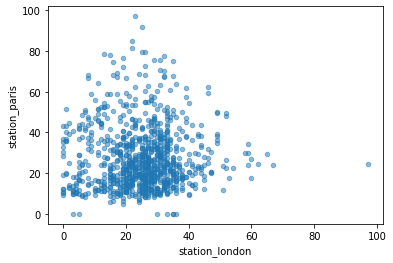

In [9]:
air_quality.plot.scatter(x="station_london",
                         y="station_paris",
                         alpha=0.5);

Помимо line графика по умолчанию при использовании plot функции, существует ряд альтернатив для построения графика данных. Давайте используем некоторый стандартный Python, чтобы получить обзор доступных методов построения графика:

In [10]:
[method_name for method_name in dir(air_quality.plot) if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

Во многих средах разработки, а также в ipython и jupyter notebook используйте кнопку TAB, чтобы получить обзор доступных методов, например air_quality.plot.+ TAB.

Один из вариантов DataFrame.plot.box(), который относится к боксу . box Метод применим на примере данных качества воздуха:

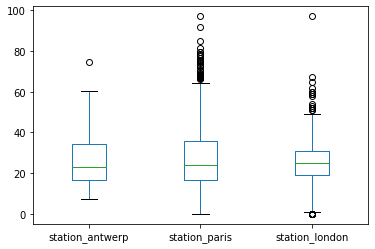

In [12]:
air_quality.plot.box();

Для ознакомления с графиками, отличными от линейного графика по умолчанию, см. Раздел руководства пользователя о поддерживаемых стилях графиков .

Я хочу, чтобы каждый из столбцов в отдельном графике.

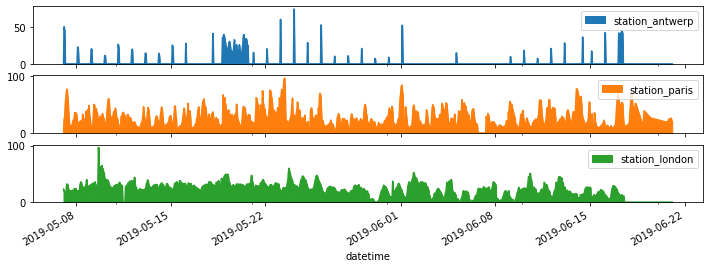

In [13]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

Отдельные субплоты для каждого из столбцов данных поддерживаются subplots аргументом plot функций. Встроенные опции, доступные в каждой из функций сюжета панд, стоит посмотреть.

Некоторые дополнительные параметры форматирования описаны в разделе руководства пользователя по форматированию графиков .

Я хочу дополнительно настроить, расширить или сохранить полученный график.

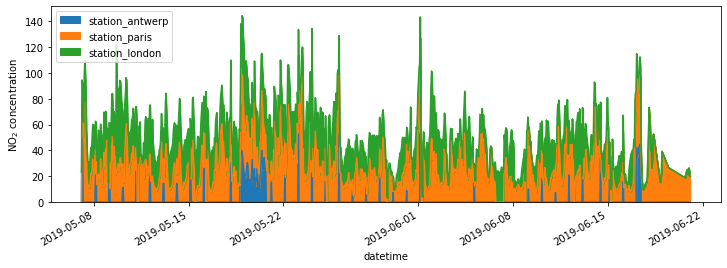

In [16]:
fig, axs = plt.subplots(figsize=(12, 4));
air_quality.plot.area(ax=axs);
axs.set_ylabel("NO$_2$ concentration");
fig.savefig("no2_concentrations.png")

Каждый из объектов сюжета, созданных пандами, является объектом [matplotlib](https://matplotlib.org/). Поскольку Matplotlib предоставляет множество опций для настройки графиков, прямая связь между пандами и Matplotlib позволяет использовать всю мощь matplotlib для графика. Эта стратегия применяется в предыдущем примере:

Полный обзор черчения в пандах представлен на страницах визуализации.